This script is the repostiry's main feature. 

Inputs are defined in the cell below.

Outputs are:
- TS and TH printed for each chosen method
- saved to out folder:
    - results.xlsx
    - Delta.png
    - Delta_boxplot.png
    - TH.png
    - TS.png

In [1]:
# Define input variables

in_dir = "../Raw Data/Applied Acoustics/"
#methods = ["beamforming", "pseudo_intensity", "allrad_decoder", "allrad2_decoder", "mad_decoder", "reference"]
methods = ["beamforming", "pseudo_intensity", "reference"]
evaluation_start_ms = 15
evaluation_stop_ms = 100
samplerate = 44100

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

from method_wrapper import method_wrapper

In [3]:
# sort folders
folders = sorted(os.listdir(in_dir))
# remove hidden folders
folders = [folder for folder in folders if '.' not in folder]



# create empty Dataframes to store results in
TS_results = pd.DataFrame()
TH_results = pd.DataFrame()
delta_results = pd.DataFrame()



# iterate through folders and methods
for folder in folders:
    print(folder)
    path = in_dir + folder + "/HOA/"
    print(path)
    for method in methods:
        try:
            TS, TH = method_wrapper(method, path, start_milliseconds = evaluation_start_ms, stop_milliseconds=evaluation_stop_ms, samplerate=samplerate)
            print(method, "TS:", TS, "TH:", TH)
        except:
            print(method, "not working")
            TS = None
            TH = None

        # save data
        TS_results.loc[folder, method] = TS
        TH_results.loc[folder, method] = TH
        try:
            delta_results.loc[folder, method] = TS - TH

        except:
            delta_results.loc[folder, method] = None


    print("")

A10p
../Raw Data/Applied Acoustics/A10p/HOA/
beamforming TS: -12.914008513843779 TH: -8.865989892645553
pseudo_intensity TS: 23.67712663369815 TH: 24.718584542745212
reference TS: -11.908589516832112 TH: -12.694100967705669

A11p
../Raw Data/Applied Acoustics/A11p/HOA/
beamforming TS: -11.9766375544421 TH: -5.932130344886286
pseudo_intensity TS: 11.466592584121834 TH: 11.51571594056163
reference TS: -11.656461692710327 TH: -12.350673513984727

A20p
../Raw Data/Applied Acoustics/A20p/HOA/
beamforming TS: -10.745650587003354 TH: -6.810458974563048
pseudo_intensity TS: 17.221586722094692 TH: 18.48306928742763
reference TS: -13.274412558850411 TH: -14.636333982242784

A21p
../Raw Data/Applied Acoustics/A21p/HOA/
beamforming TS: -9.415664583862245 TH: -3.4144791204220297
pseudo_intensity TS: 11.93197032973558 TH: 13.859244016900657
reference TS: -13.251902662789206 TH: -14.69200774919978

A30p
../Raw Data/Applied Acoustics/A30p/HOA/
beamforming TS: 1.6987410141164356 TH: -3.8794083114764777

In [4]:
# create out folder
os.makedirs("../out", exist_ok=True)

# write dataframe to excel
with pd.ExcelWriter('../out/results.xlsx', engine='openpyxl') as writer:
    TS_results.to_excel(writer, sheet_name='TS')
    TH_results.to_excel(writer, sheet_name='TH')
    delta_results.to_excel(writer, sheet_name='delta')

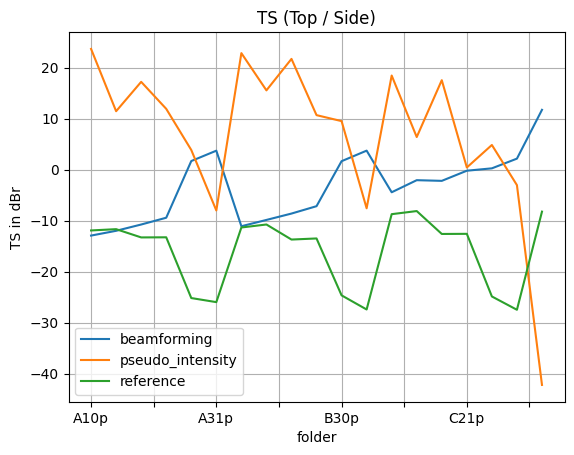

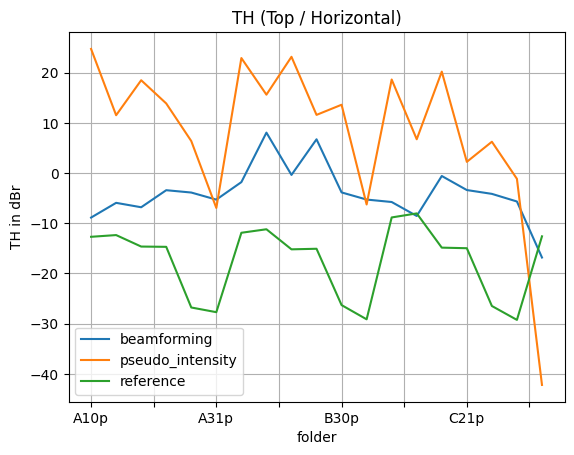

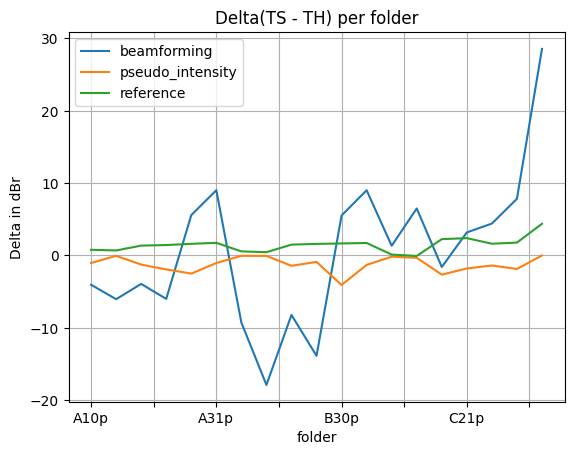

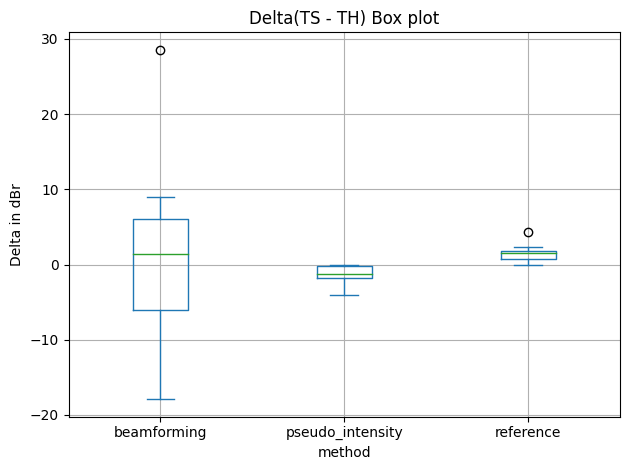

In [5]:
# plot and save results
 
TS_results.plot()
plt.title('TS (Top / Side)')
plt.xlabel('folder')
plt.ylabel('TS in dBr')
plt.grid()

plt.savefig('../out/TS.png')
plt.show()


TH_results.plot()
plt.title('TH (Top / Horizontal)')
plt.xlabel('folder')
plt.ylabel('TH in dBr')
plt.grid()

plt.savefig('../out/TH.png')
plt.show()


delta_results.plot()
plt.title('Delta(TS - TH) per folder')
plt.xlabel('folder')
plt.ylabel('Delta in dBr')
plt.grid()

plt.savefig('../out/Delta.png')
plt.show()


delta_results.plot(kind='box')
plt.title('Delta(TS - TH) Box plot')
plt.xlabel('method')
plt.ylabel('Delta in dBr')
plt.grid()
plt.tight_layout()
plt.savefig('../out/Delta_boxplot.png')
plt.show()
